In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from copy import deepcopy

In [2]:
#Definition of global parameters
Niter=1000
M=100
delta=0.003   #1/((M/2)-1)
w_1=1.
m=np.arange(1,M+1)
epsilon=0.1
Delta=1.
g=np.arange(0,2,0.01) 

#colors for the plotting
c1='#140b34'
c2='#84206b'
c3='#e55c30'
c4='#f6d746'
colors=[c3, c2, c4, c1]

#Definition of final lists for 1st parametrization (f_m = -c_k/(W+w_k) ; l_m = c_k*epsilon_r/(w_k*(W+w_k))
epsilon_r_final_param1=[]
Delta_r_final_param1=[]
E_gs_final_param1=[]
sigma_x_med_param1=[]

#Definition of final lists for 2nd parametrization (f_m = -c_k/w_k ; l_m = 0)
epsilon_r_final_param2=[]
Delta_r_final_param2=[]
E_gs_final_param2=[]
sigma_x_med_param2=[]

#Definition of the difference of Egs between 1st and 2nd parametrization for the evaluation
deltaE_gs_12=[]

#Definition of real final lists (chosen between 1st and 2nd parametrization)
epsilon_r_final=[]
Delta_r_final=[]
E_gs_final=[]
sigma_x_med=[]


In [3]:
def eigenvalue(Del,eps): #def W
    return np.sqrt(Del**2 + eps**2)

#print(eigenvalue(Delta,epsilon))
#print(np.sqrt(1**2 + 0.1**2))

In [4]:
def coupling_m(n,coup): #def g_m
    return coup*np.sin(n*np.pi/2.)*np.sqrt(n)/(1.+delta*(n-1.))

#print(coupling_m(m,0.2))
#print(0.2*np.sin(3*np.pi/2.)*np.sqrt(3)/(1.+delta*(3-1.)))

In [5]:
def f_variational_param1(n,coup,Del,eps): #def f_m
    return -coupling_m(n,coup)/(eigenvalue(Del,eps)+n*w_1)

#print(f_variational(m,0.2,Delta,epsilon))
#print(-coupling_m(3,0.2)/(eigenvalue(Delta,epsilon)+3*w_1))

In [6]:
def f_variational_param2(n,coup,Del,eps): #def f_m
    return -coupling_m(n,coup)/(n*w_1)

In [7]:
def l_variational_param1(n,coup,Del,eps): #def l_m
    step=(coupling_m(n,coup)*eps)/(n*w_1*(eigenvalue(Del,eps)+n*w_1))
    #step=[x for x in step if math.isnan(x) == False]
    return step

#print(l_variational(m,0.2,Delta,epsilon)) #PROBLEMA - El primer término es un "nan" y entonces me dará problemas después
#print((coupling_m(3,0.2)*epsilon)/(3*w_1*(eigenvalue(Delta,epsilon)+3*w_1)))

In [8]:
def l_variational_param2(n,coup,Del,eps): #def l_m
    x=0
    return x

In [9]:
def energy_gs_param1(n,coup,Del,eps): #def E_gs
    #np.seterr(invalid='ignore')
    term_1=coupling_m(n,coup)*f_variational_param1(n,coup,Del,eps)
    #print(term_1)
    term_2=n*w_1*((f_variational_param1(n,coup,Del,eps)**2)+(l_variational_param1(n,coup,Del,eps)**2))
    #print(term_2)
    sum_1=np.nansum(term_1)
    #print(sum_1)
    sum_2=np.nansum(term_2)
    #print(sum_2)   #-   PROBLEMA - El primer término de term_2 es un "nan" y entonces sum_2 sale nan y el resultado nan
    return -(eigenvalue(Del,eps)/2)+2*sum_1+sum_2

#print(energy_gs(m,0.83,0.08,0.22))
#print(-(eigenvalue(Delta,epsilon)/2)+2*np.nansum(coupling_m(m,0.2)*f_variational(m,0.2,Delta,epsilon))+np.nansum(m*w_1*((f_variational(m,0.2,Delta,epsilon)**2)+(l_variational(m,0.2,Delta,epsilon)**2))))

In [10]:
def energy_gs_param2(n,coup,Del,eps): #def E_gs
    #np.seterr(invalid='ignore')
    term_1=coupling_m(n,coup)*f_variational_param2(n,coup,Del,eps)
    #print(term_1)
    term_2=n*w_1*((f_variational_param2(n,coup,Del,eps)**2)+(l_variational_param2(n,coup,Del,eps)**2))
    #print(term_2)
    sum_1=np.nansum(term_1)
    #print(sum_1)
    sum_2=np.nansum(term_2)
    #print(sum_2)   #-   PROBLEMA - El primer término de term_2 es un "nan" y entonces sum_2 sale nan y el resultado nan
    return -(eigenvalue(Del,eps)/2)+2*sum_1+sum_2

In [11]:
def f_Delta_r_param1(n,coup,Del,eps):
    f_m=f_variational_param1(n,coup,Del,eps)
    patata_1=f_m**2
    return Delta*math.exp(-2*np.nansum(patata_1))

In [12]:
def f_Delta_r_param2(n,coup,Del,eps):
    f_m=f_variational_param2(n,coup,Del,eps)
    patata_1=f_m**2
    return Delta*math.exp(-2*np.nansum(patata_1))

In [13]:
def f_epsilon_r_param1(n,coup,Del,eps):
    g_m=coupling_m(n,coup)
    f_m=f_variational_param1(n,coup,Del,eps)
    l_m=l_variational_param1(n,coup,Del,eps)
    patata_2=l_m*(g_m+m*w_1*f_m)
    return epsilon+4*np.nansum(patata_2)

In [14]:
def f_epsilon_r_param2(n,coup,Del,eps):
    g_m=coupling_m(n,coup)
    f_m=f_variational_param2(n,coup,Del,eps)
    l_m=l_variational_param2(n,coup,Del,eps)
    patata_2=l_m*(g_m+m*w_1*f_m)
    return epsilon+4*np.nansum(patata_2)

In [15]:
k=0
for i in range(np.size(g)):
    #Initialization
    g_aux=g[i]
    print("g",k,"=",g_aux)
    
    Delta_r_aux_1=deepcopy(Delta)
    epsilon_r_aux_1=deepcopy(epsilon)
    
    Delta_r_aux_2=deepcopy(Delta)
    epsilon_r_aux_2=deepcopy(epsilon)

    #It makes the process once to obtain 2 first values of each Delta_r and epsilon_r to compare the error
    Delta_r_1=deepcopy(f_Delta_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
    epsilon_r_1=deepcopy(f_epsilon_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        
    Delta_r_2=deepcopy(f_Delta_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    epsilon_r_2=deepcopy(f_epsilon_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    
    #Assignments
    Delta_r_old_1=deepcopy(Delta_r_aux_1)
    epsilon_r_old_1=deepcopy(epsilon_r_aux_1)
    Delta_r_aux_1=deepcopy(Delta_r_1)
    epsilon_r_aux_1=deepcopy(epsilon_r_1)
    
    Err_Delta_1=deepcopy(np.sqrt(abs(Delta_r_aux_1-Delta_r_old_1)**2))
    Err_epsilon_1=deepcopy(np.sqrt(abs(epsilon_r_aux_1-epsilon_r_old_1)**2))
    
    Delta_r_old_2=deepcopy(Delta_r_aux_2)
    epsilon_r_old_2=deepcopy(epsilon_r_aux_2)
    Delta_r_aux_2=deepcopy(Delta_r_2)
    epsilon_r_aux_2=deepcopy(epsilon_r_2)
    
    Err_Delta_2=deepcopy(np.sqrt(abs(Delta_r_aux_2-Delta_r_old_2)**2))
    Err_epsilon_2=deepcopy(np.sqrt(abs(epsilon_r_aux_2-epsilon_r_old_2)**2))
    
    #Termalization until it arrives to Niter steps or until sqrt(abs(Ar'-Ar)**2) & sqrt(abs(er'-er)**2) is <10**(-3) :
    j=0
    while ((Err_Delta_1>=0.0001) and (Err_epsilon_1>=0.0001) and (Err_Delta_2>=0.0001) and (Err_epsilon_2>=0.0001)):
        #Repeats the process until it obtais stable values of each Delta_r and epsilon_r
        Delta_r_1=deepcopy(f_Delta_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        epsilon_r_1=deepcopy(f_epsilon_r_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
        
        Delta_r_2=deepcopy(f_Delta_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
        epsilon_r_2=deepcopy(f_epsilon_r_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    
        #Assignments
        Delta_r_old_1=deepcopy(Delta_r_aux_1)
        epsilon_r_old_1=deepcopy(epsilon_r_aux_1)
        Delta_r_aux_1=deepcopy(Delta_r_1)
        epsilon_r_aux_1=deepcopy(epsilon_r_1)
    
        Err_Delta_1=deepcopy(np.sqrt(abs(Delta_r_aux_1-Delta_r_old_1)**2))
        Err_epsilon_1=deepcopy(np.sqrt(abs(epsilon_r_aux_1-epsilon_r_old_1)**2))
    
        Delta_r_old_2=deepcopy(Delta_r_aux_2)
        epsilon_r_old_2=deepcopy(epsilon_r_aux_2)
        Delta_r_aux_2=deepcopy(Delta_r_2)
        epsilon_r_aux_2=deepcopy(epsilon_r_2)
    
        Err_Delta_2=deepcopy(np.sqrt(abs(Delta_r_aux_2-Delta_r_old_2)**2))
        Err_epsilon_2=deepcopy(np.sqrt(abs(epsilon_r_aux_2-epsilon_r_old_2)**2))
        
        j=j+1
        if (j==Niter):
            print("He llegado hasta la iteración 1000 antes de una solución") #ahota 10000 que no lo he cambiado
            break
            
    E_gs_1=deepcopy(energy_gs_param1(m,g_aux,Delta_r_aux_1,epsilon_r_aux_1))
    sigma_x_1=deepcopy(0.5*epsilon_r_aux_1/eigenvalue(Delta_r_aux_1,epsilon_r_aux_1))
    print("E_gs_1 = ",E_gs_1)
    print("Delta_r_1 =",Delta_r_aux_1)
    print("epsilon_r_1 =",epsilon_r_aux_1)
    print("sigma_x_1=",sigma_x_1)
    print("\n")
    Delta_r_final_param1.append(Delta_r_aux_1)
    epsilon_r_final_param1.append(epsilon_r_aux_1)
    E_gs_final_param1.append(E_gs_1)
    sigma_x_med_param1.append(sigma_x_1)
    
    E_gs_2=deepcopy(energy_gs_param2(m,g_aux,Delta_r_aux_2,epsilon_r_aux_2))
    sigma_x_2=deepcopy(0.5*epsilon_r_aux_2/eigenvalue(Delta_r_aux_2,epsilon_r_aux_2))
    print("E_gs_2 = ",E_gs_2)
    print("Delta_r_2 =",Delta_r_aux_2)
    print("epsilon_r_2 =",epsilon_r_aux_2)
    print("sigma_x_2=",sigma_x_2)
    print("\n")
    Delta_r_final_param2.append(Delta_r_aux_2)
    epsilon_r_final_param2.append(epsilon_r_aux_2)
    E_gs_final_param2.append(E_gs_2)
    sigma_x_med_param2.append(sigma_x_2)
    
    #Now it makes the comparison between the energies in order to choose the values of one of the two parametrizations
    comparison=deepcopy(E_gs_1-E_gs_2)
    deltaE_gs_12.append(comparison)
    print("deltaE_gs_12 =",comparison)
    print("\n")
    
    if(comparison<0):
        print("E_gs = ",E_gs_1)
        print("Delta_r =",Delta_r_aux_1)
        print("epsilon_r =",epsilon_r_aux_1)
        print("sigma_x=",sigma_x_1)
        print("\n")
        Delta_r_final.append(Delta_r_aux_1)
        epsilon_r_final.append(epsilon_r_aux_1)
        #E_gs_final.append(E_gs_1)
        sigma_x_med.append(sigma_x_1)
    else:
        print("E_gs = ",E_gs_2)
        print("Delta_r =",Delta_r_aux_2)
        print("epsilon_r =",epsilon_r_aux_2)
        print("sigma_x=",sigma_x_2)
        print("\n")
        Delta_r_final.append(Delta_r_aux_2)
        epsilon_r_final.append(epsilon_r_aux_2)
        #E_gs_final.append(E_gs_2)
        sigma_x_med.append(sigma_x_2)
            
    k=k+1



g 0 = 0.0
E_gs_1 =  -0.5024937810560445
Delta_r_1 = 1.0
epsilon_r_1 = 0.1
sigma_x_1= 0.049751859510499465


E_gs_2 =  -0.5024937810560445
Delta_r_2 = 1.0
epsilon_r_2 = 0.1
sigma_x_2= 0.049751859510499465


deltaE_gs_12 = 0.0


E_gs =  -0.5024937810560445
Delta_r = 1.0
epsilon_r = 0.1
sigma_x= 0.049751859510499465


g 1 = 0.01
E_gs_1 =  -0.5061589474671897
Delta_r_1 = 0.9996748669175672
epsilon_r_1 = 0.1000159643292284
sigma_x_1= 0.04977574683385143


E_gs_2 =  -0.5060911393608495
Delta_r_2 = 0.9994587841542676
epsilon_r_2 = 0.1
sigma_x_2= 0.04977853362827746


deltaE_gs_12 = -6.780810634021694e-05


E_gs =  -0.5061589474671897
Delta_r = 0.9996748669175672
epsilon_r = 0.1000159643292284
sigma_x= 0.04977574683385143


g 2 = 0.02
E_gs_1 =  -0.5171549587269589
Delta_r_1 = 0.9987001018019267
epsilon_r_1 = 0.10006385731691354
sigma_x_1= 0.049847468716794956


E_gs_2 =  -0.5168840970042721
Delta_r_2 = 0.9978368934705862
epsilon_r_2 = 0.1
sigma_x_2= 0.04985864009719439


deltaE_gs_12 = -0.0002

deltaE_gs_12 = -0.04390506073014144


E_gs =  -4.294867408656669
Delta_r = 0.7167770662625587
epsilon_r = 0.11634747312986488
sigma_x= 0.08011162910112085


g 33 = 0.33
E_gs_1 =  -4.5378862479788316
Delta_r_1 = 0.701785484582761
epsilon_r_1 = 0.11738515452970982
sigma_x_1= 0.08248725973869943


E_gs_2 =  -4.492513956983665
Delta_r_2 = 0.554580334361878
epsilon_r_2 = 0.1
sigma_x_2= 0.0887273588476392


deltaE_gs_12 = -0.045372290995166153


E_gs =  -4.5378862479788316
Delta_r = 0.701785484582761
epsilon_r = 0.11738515452970982
sigma_x= 0.08248725973869943


g 34 = 0.34
E_gs_1 =  -4.788625657630178
Delta_r_1 = 0.6866607256989145
epsilon_r_1 = 0.11845476458801152
sigma_x_1= 0.08499874207219389


E_gs_2 =  -4.741862626668504
Delta_r_2 = 0.5348254305275282
epsilon_r_2 = 0.1
sigma_x_2= 0.09189589179876581


deltaE_gs_12 = -0.04676303096167356


E_gs =  -4.788625657630178
Delta_r = 0.6866607256989145
epsilon_r = 0.11845476458801152
sigma_x= 0.08499874207219389


g 35 = 0.35000000000000003
E_g

E_gs_1 =  -12.282465074485334
Delta_r_1 = 0.3606731479525483
epsilon_r_1 = 0.1500641364602112
sigma_x_1= 0.19207172648166193


E_gs_2 =  -12.230043057882218
Delta_r_2 = 0.18310191875545437
epsilon_r_2 = 0.1
sigma_x_2= 0.23965917815410004


deltaE_gs_12 = -0.052422016603115296


E_gs =  -12.282465074485334
Delta_r = 0.3606731479525483
epsilon_r = 0.1500641364602112
sigma_x= 0.19207172648166193


g 57 = 0.5700000000000001
E_gs_1 =  -12.713721412365901
Delta_r_1 = 0.34766039559080403
epsilon_r_1 = 0.15186810566301856
sigma_x_1= 0.2001512904988174


E_gs_2 =  -12.66223752093419
Delta_r_2 = 0.17223657790588554
epsilon_r_2 = 0.1
sigma_x_2= 0.2510521083672818


deltaE_gs_12 = -0.051483891431711726


E_gs =  -12.713721412365901
Delta_r = 0.34766039559080403
epsilon_r = 0.15186810566301856
sigma_x= 0.2001512904988174


g 58 = 0.58
E_gs_1 =  -13.152890202325084
Delta_r_1 = 0.3348992513484274
epsilon_r_1 = 0.15370400352428262
sigma_x_1= 0.20856114234029643


E_gs_2 =  -13.102439694768401
Delta_r_

epsilon_r_2 = 0.1
sigma_x_2= 0.4902775069477261


deltaE_gs_12 = -0.004020311035397128


E_gs =  -27.991359621297608
Delta_r = 0.09541986571089811
epsilon_r = 0.21534227867507197
sigma_x= 0.45713224336660563


g 86 = 0.86
E_gs_1 =  -28.650458721305867
Delta_r_1 = 0.09025870035109683
epsilon_r_1 = 0.2180721789731256
sigma_x_1= 0.46199199548553144


E_gs_2 =  -28.64836553598968
Delta_r_2 = 0.018244055387919175
epsilon_r_2 = 0.1
sigma_x_2= 0.4918809863897401


deltaE_gs_12 = -0.002093185316187629


E_gs =  -28.650458721305867
Delta_r = 0.09025870035109683
epsilon_r = 0.2180721789731256
sigma_x= 0.46199199548553144


g 87 = 0.87
E_gs_1 =  -29.317288565768855
Delta_r_1 = 0.08532118872539815
epsilon_r_1 = 0.22083400792963598
sigma_x_1= 0.46639980675232356


E_gs_2 =  -29.31715121175084
Delta_r_2 = 0.016612968199818074
epsilon_r_2 = 0.1
sigma_x_2= 0.4932398452214258


deltaE_gs_12 = -0.00013735401801540092


E_gs =  -29.317288565768855
Delta_r = 0.08532118872539815
epsilon_r = 0.2208340079296

sigma_x= 0.49998063944119214


g 115 = 1.1500000000000001
E_gs_1 =  -51.093680074998666
Delta_r_1 = 0.013560634789772916
epsilon_r_1 = 0.311128254045374
sigma_x_1= 0.49952575483009126


E_gs_2 =  -51.18608447283395
Delta_r_2 = 0.0007774298394088802
epsilon_r_2 = 0.1
sigma_x_2= 0.49998489075601527


deltaE_gs_12 = 0.09240439783528132


E_gs =  -51.18608447283395
Delta_r = 0.0007774298394088802
epsilon_r = 0.1
sigma_x= 0.49998489075601527


g 116 = 1.16
E_gs_1 =  -51.98139120263112
Delta_r_1 = 0.012579306724981622
epsilon_r_1 = 0.31481601409713045
sigma_x_1= 0.4996013239744003


E_gs_2 =  -52.07927394295938
Delta_r_2 = 0.0006860418948478854
epsilon_r_2 = 0.1
sigma_x_2= 0.4999882340782866


deltaE_gs_12 = 0.09788274032825939


E_gs =  -52.07927394295938
Delta_r = 0.0006860418948478854
epsilon_r = 0.1
sigma_x= 0.4999882340782866


g 117 = 1.17
E_gs_1 =  -52.87663502883325
Delta_r_1 = 0.011661406668658851
epsilon_r_1 = 0.3185357028073439
sigma_x_1= 0.4996652740544192


E_gs_2 =  -52.9801967

g 159 = 1.59
E_gs_1 =  -97.20914819799378
Delta_r_1 = 0.00026893899373378263
epsilon_r_1 = 0.5035942072227676
sigma_x_1= 0.499999928700577


E_gs_2 =  -97.80208418592997
Delta_r_2 = 1.1380643021497809e-06
epsilon_r_2 = 0.1
sigma_x_2= 0.49999999996762023


deltaE_gs_12 = 0.5929359879361868


E_gs =  -97.80208418592997
Delta_r = 1.1380643021497809e-06
epsilon_r = 0.1
sigma_x= 0.49999999996762023


g 160 = 1.6
E_gs_1 =  -98.42317106832294
Delta_r_1 = 0.00024243902776061905
epsilon_r_1 = 0.5086868282466219
sigma_x_1= 0.49999994321364183


E_gs_2 =  -99.03553677306205
Delta_r_2 = 9.57561095265849e-07
epsilon_r_2 = 0.1
sigma_x_2= 0.4999999999770769


deltaE_gs_12 = 0.6123657047391049


E_gs =  -99.03553677306205
Delta_r = 9.57561095265849e-07
epsilon_r = 0.1
sigma_x= 0.4999999999770769


g 161 = 1.61
E_gs_1 =  -99.64447476017331
Delta_r_1 = 0.00021840814934157495
epsilon_r_1 = 0.5138113779289329
sigma_x_1= 0.4999999548279091


E_gs_2 =  -100.27672260525483
Delta_r_2 = 8.048148169053805e-07
e

epsilon_r_1 = 0.6172442669996306
sigma_x_1= 0.4999999995370319


E_gs_2 =  -125.32856997840376
Delta_r_2 = 2.4122029401162565e-08
epsilon_r_2 = 0.1
sigma_x_2= 0.49999999999998546


deltaE_gs_12 = 1.1049472891632774


E_gs =  -125.32856997840376
Delta_r = 2.4122029401162565e-08
epsilon_r = 0.1
sigma_x= 0.49999999999998546


g 181 = 1.81
E_gs_1 =  -125.58911314432999
Delta_r_1 = 2.361999647150604e-05
epsilon_r_1 = 0.6230073898510772
sigma_x_1= 0.49999999964065367


E_gs_2 =  -126.72442071180512
Delta_r_2 = 1.9839872898994802e-08
epsilon_r_2 = 0.1
sigma_x_2= 0.4999999999999902


deltaE_gs_12 = 1.135307567475138


E_gs =  -126.72442071180512
Delta_r = 1.9839872898994802e-08
epsilon_r = 0.1
sigma_x= 0.4999999999999902


g 182 = 1.82
E_gs_1 =  -126.96173910558738
Delta_r_1 = 2.0990105534349398e-05
epsilon_r_1 = 0.6288024413609805
sigma_x_1= 0.49999999972142584


E_gs_2 =  -128.12800469026686
Delta_r_2 = 1.6300229057908047e-08
epsilon_r_2 = 0.1
sigma_x_2= 0.49999999999999334


deltaE_gs_12 = 

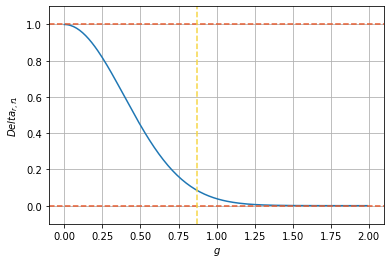

In [16]:
#Delta_r 1st parametrization
plt.plot(g,Delta_r_final_param1)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f1}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

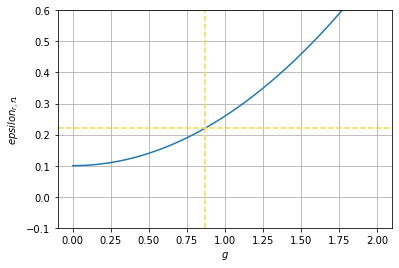

In [17]:
#epsilon_r 1st parametrization
plt.plot(g,epsilon_r_final_param1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f1}$')
plt.axvline(0.87,c=c4,linestyle='--')
plt.axhline(0.22,c=c4,linestyle='--')
plt.grid()
plt.show()

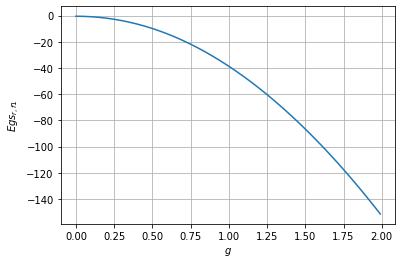

In [18]:
#E_gs 1st parametrization
plt.plot(g,E_gs_final_param1)
plt.xlabel('$g$')
plt.ylabel('$Egs_{r,f1}$')
plt.grid()
plt.show()

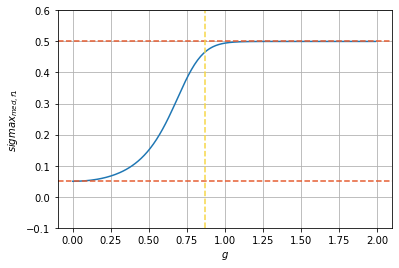

In [19]:
#sigma_x_med 1st parametrization
plt.plot(g,sigma_x_med_param1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f1}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3, linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

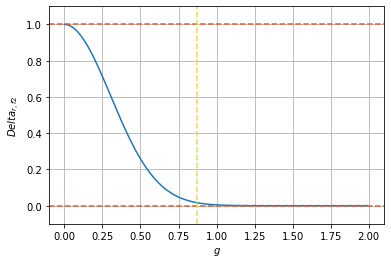

In [20]:
#Delta_r 2nd parametrization
plt.plot(g,Delta_r_final_param2)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f2}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

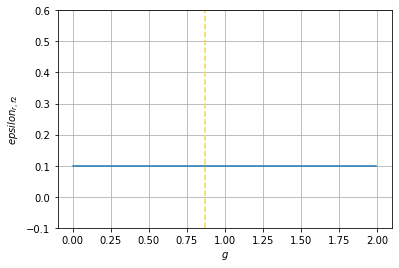

In [21]:
#epsilon_r 2nd parametrization
plt.plot(g,epsilon_r_final_param2)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f2}$')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

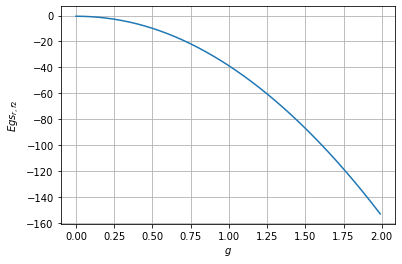

In [22]:
#E_gs 2nd parametrization
plt.plot(g,E_gs_final_param2)
plt.xlabel('$g$')
plt.ylabel('$Egs_{r,f2}$')
plt.grid()
plt.show()

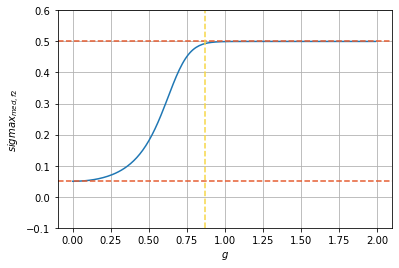

In [23]:
#sigma_x_med 2nd parametrization
plt.plot(g,sigma_x_med_param2)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f2}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

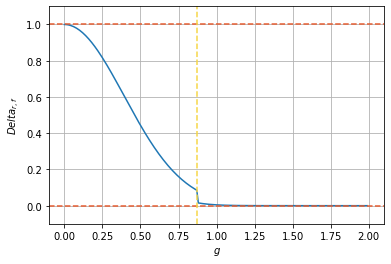

In [24]:
#Delta_r final
plt.plot(g,Delta_r_final)
plt.xlabel('$g$')
plt.ylabel('$Delta_{r,f}$')
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,1.1)
plt.axhline(0,c=c3,linestyle='--')
plt.axhline(1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

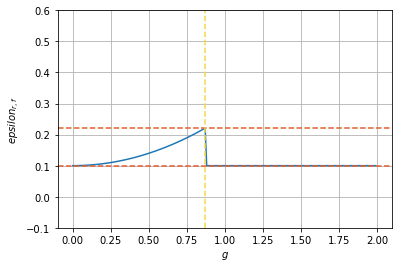

In [25]:
#epsilon_r
plt.plot(g,epsilon_r_final)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$epsilon_{r,f}$')
plt.axhline(0.22,c=c3,linestyle='--')
plt.axhline(0.1,c=c3,linestyle='--')
plt.axvline(0.87,c=c4,linestyle='--')
plt.grid()
plt.show()

In [26]:
#E_gs
#plt.plot(g,E_gs_final)
#plt.xlabel('$g$')
#plt.ylabel('$Egs_{r,f}$')
#plt.grid()
#plt.show()

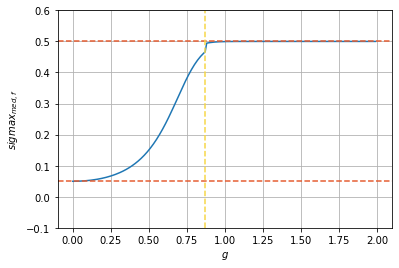

In [27]:
#sigma_x_med
plt.plot(g,sigma_x_med)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.6)
plt.xlabel('$g$')
plt.ylabel('$sigmax_{med,f}$')
plt.axhline(0.5,c=c3,linestyle='--')
plt.axhline(0.05,c=c3,linestyle='--')
plt.axvline(0.87,c=c4, linestyle='--')
plt.grid()
plt.show()

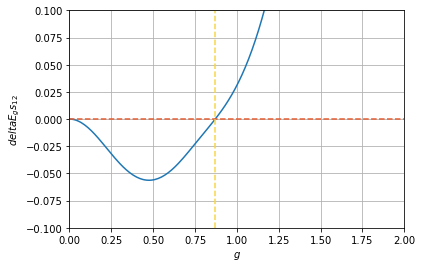

In [28]:
plt.plot(g,deltaE_gs_12)
plt.xlim(0,2)
plt.ylim(-0.1,0.1)
plt.xlabel('$g$')
plt.ylabel('$deltaE_gs_{12}$')
plt.axhline(0,c=c3,linestyle='--')
plt.axvline(0.87,c=c4, linestyle='--')
plt.grid()
plt.show()

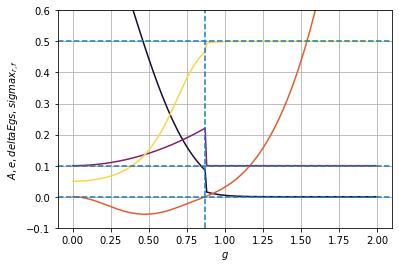

-0.056256243858893384


In [29]:
plt.plot(g,Delta_r_final,c=c1)
plt.plot(g,epsilon_r_final,c=c2)
plt.plot(g,deltaE_gs_12,c=c3)
plt.plot(g,sigma_x_med,c=c4)
plt.xlabel('$g$')
plt.ylabel('$A,e,deltaEgs,sigmax_{r,f}$')
plt.xlim(-0.1,2.1)
#plt.ylim(-0.1,1.1)
plt.ylim(-0.1,0.6)
plt.axhline(0,linestyle='--')
plt.axhline(1,linestyle='--')
plt.axhline(0.5,linestyle='--')
plt.axhline(0.1, linestyle='--')
plt.axvline(0.87, linestyle='--')
plt.grid()
plt.show()
print(np.min(deltaE_gs_12))

In [30]:
Ar1=[]
Ar1_1=[]
Ar1_2=[]

Ar2=[]
Ar2_1=[]
Ar2_2=[]

Ars=np.arange(0,1,0.01)

for i in range(np.size(Ars)):
    
    Ar_local=Ars[i]
    
    res1=f_Delta_r_param1(m,0.2,Ar_local,epsilon)
    res1_1=f_Delta_r_param1(m,0.5,Ar_local,epsilon)
    res1_2=f_Delta_r_param1(m,0.8,Ar_local,epsilon)
    
    res2=f_Delta_r_param2(m,0.2,Ar_local,epsilon)
    res2_1=f_Delta_r_param2(m,0.5,Ar_local,epsilon)
    res2_2=f_Delta_r_param2(m,0.8,Ar_local,epsilon)
    
    Ar1.append(res1)
    Ar1_1.append(res1_1)
    Ar1_2.append(res1_2)
    
    Ar2.append(res2)
    Ar2_1.append(res2_1)
    Ar2_2.append(res2_2)

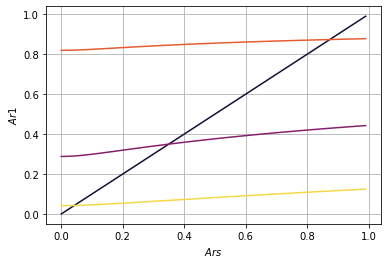

In [31]:
plt.plot(Ars,Ars,c=c1)
plt.plot(Ars,Ar1,c=c3)
plt.plot(Ars,Ar1_1,c=c2)
plt.plot(Ars,Ar1_2,c=c4)
#plt.ylim(0.8,1) #para Ar1 - g=0.2
#plt.ylim(0.2,0.5) #para Ar1_1 - g=0.5
#plt.ylim(0,0.2) #para Ar1_2 - g=0.8
plt.xlabel('$Ars$')
plt.ylabel('$Ar1$')
plt.grid()
plt.show()

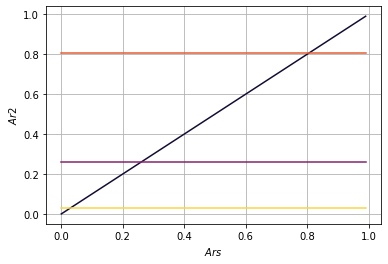

In [32]:
plt.plot(Ars,Ars,c=c1)
plt.plot(Ars,Ar2,c=c3)
plt.plot(Ars,Ar2_1,c=c2)
plt.plot(Ars,Ar2_2,c=c4)
plt.xlabel('$Ars$')
plt.ylabel('$Ar2$')
plt.grid()
plt.show()

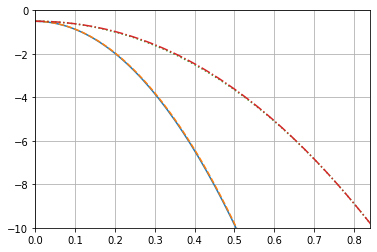

[2.49378103e-03 4.93348551e-03 1.22528666e-02 2.44527253e-02
 4.15343903e-02 6.34997080e-02 9.03510295e-02 1.22091194e-01
 1.58723506e-01 2.00251717e-01 2.46679991e-01 2.98012885e-01
 3.54255306e-01 4.15412485e-01 4.81489940e-01 5.52493433e-01
 6.28428938e-01 7.09302598e-01 7.95120683e-01 8.85889553e-01
 9.81615618e-01 1.08230529e+00 1.18796497e+00 1.29860097e+00
 1.41421950e+00 1.53482664e+00 1.66042831e+00 1.79103021e+00
 1.92663783e+00 2.06725638e+00 2.21289084e+00 2.36354585e+00
 2.51922577e+00 2.67993465e+00 2.84567617e+00 3.01645370e+00
 3.19227027e+00 3.37312856e+00 3.55903092e+00 3.74997937e+00
 3.94597560e+00 4.14702100e+00 4.35311664e+00 4.56426332e+00
 4.78046157e+00 5.00171165e+00 5.22801362e+00 5.45936729e+00
 5.69577227e+00 5.93722798e+00 6.18373369e+00 6.43528846e+00
 6.69189120e+00 6.95354068e+00 7.22023546e+00 7.49197394e+00
 7.76875430e+00 8.05057451e+00 8.33743224e+00 8.62932488e+00
 8.92624946e+00 9.22820260e+00 9.53518048e+00 9.84717879e+00
 1.01641927e+01 1.048621

In [33]:
plt.plot(g,E_gs_final_param1)
plt.plot(g,E_gs_final_param2,ls="--")
np.save("Juntos_1",E_gs_final_param1)
np.save("Juntos_2",E_gs_final_param2)
E_gs_final_param1_separados=np.load("Separados_1.npy")
E_gs_final_param2_separados=np.load("Separados_2.npy")
plt.ylim(-10,0)
plt.xlim(0,0.84)
plt.plot(g,E_gs_final_param1_separados,ls=":")
plt.plot(g,E_gs_final_param2_separados,ls="-.")
plt.grid()
plt.show()

print(abs(E_gs_final_param2_separados-E_gs_final_param2))
print(abs(E_gs_final_param1_separados-E_gs_final_param1))

print(abs(E_gs_final_param2_separados-E_gs_final_param2))
print(abs(E_gs_final_param1_separados-E_gs_final_param1))

(-0.1, 0.1)

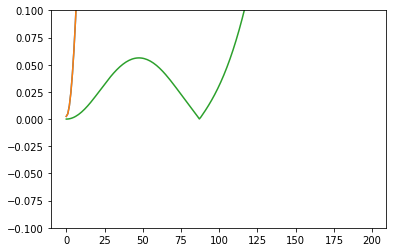

In [34]:
plt.plot(abs(E_gs_final_param2_separados-E_gs_final_param2))
plt.plot(abs(E_gs_final_param1_separados-E_gs_final_param1))
E_gs_final_param1=np.array(E_gs_final_param1)
E_gs_final_param2=np.array(E_gs_final_param2)
plt.plot(abs(E_gs_final_param1-E_gs_final_param2))
plt.ylim(-0.1,0.1)

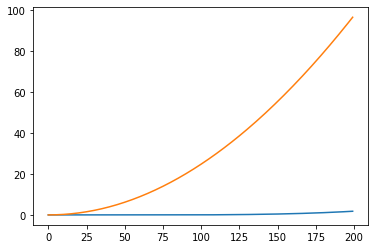

In [35]:
plt.plot(abs(E_gs_final_param1-E_gs_final_param2))
plt.plot(abs(E_gs_final_param1_separados-E_gs_final_param1))